# Simple Spherical Harmonics Expansions

This script demonstrates how to expand and analyse a global spherical function in spherical harmonics using SHTOOLS.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In this example, we use Earth topograpgy data that is provided in the example directory

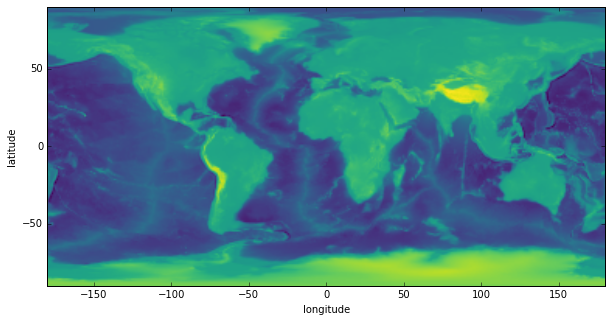

In [2]:
# read earth topography example data
infile = '../ExampleDataFiles/topo.dat.gz'
topo = np.loadtxt(infile)

# plot
fig, ax = plt.subplots(1, 1, figsize= (10, 5))
ax.imshow(topo, extent=(-180, 180, -90, 90), cmap='viridis')
ax.set(xlabel='longitude', ylabel='latitude');

## Computing power spectral densities

Power spectra show the distribution of variance of the spherical harmonics coefficients. Concentration of energy (power) in spherical harmonics with a particular wavelength's can give a hint about the scales of features.


pyshtools 3.3-beta -- Tools for working with spherical harmonics.


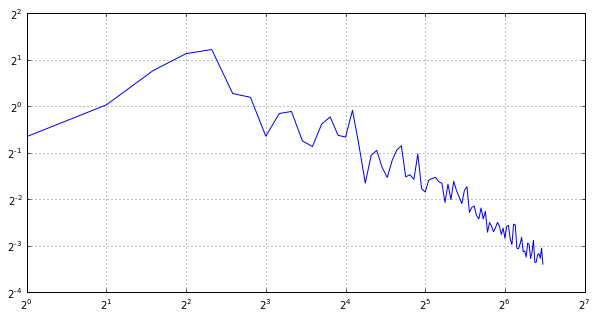

In [3]:
from pyshtools.expand import SHExpandDH;
from pyshtools.spectralanalysis import SHPowerSpectrumDensity;

coeffs = SHExpandDH(topo, sampling=2)
nl = coeffs.shape[1]
ls = np.arange(nl)

# a spherical harmonics spectrum can be seen using
# different power spectra:
# power per l and m can be seen as the power spectral density of the
# 2D function, similar to power per kx and ky in Fourier domain.
power_per_lm = SHPowerSpectrumDensity(coeffs)

# the power per l, is somewhat equivalent to the power at a given
# magnitude |k| in 2D Fourier domain
power_per_l = power_per_lm * (2 * ls + 1)

# the power per log(l) 'band power' corresponds to the
# full coefficient energy in a logarithmic band (e.g. factor 2)
# and is useful to analyse dominant scales. It is connected to
# localized, as opposed to standing wave energy and thus appropriate
# to look at the variance spectrum of Earth's topography.
power_per_logl = np.log(2) * ls * power_per_l

# plot band power
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(ls, power_per_logl)
ax.set_yscale('log', basey=2)
ax.set_xscale('log', basex=2)
ax.grid()

## Simple Filtering

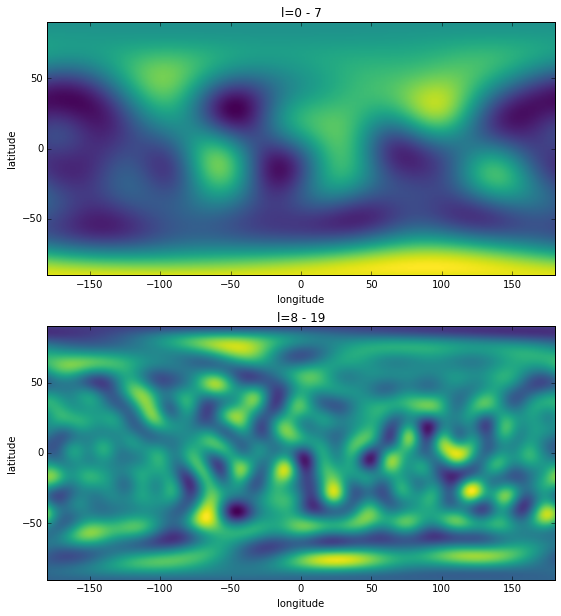

In [4]:
from pyshtools.expand import MakeGridDH;

coeffs_filtered = coeffs.copy()
lmax = 8
coeffs_filtered[:, lmax:, :] = 0.

topo_filtered = MakeGridDH(coeffs_filtered, sampling=2)

coeffs_filtered2 = coeffs.copy()
lmin, lmax = 8, 20
coeffs_filtered2[:, :lmin, :] = 0.
coeffs_filtered2[:, lmax:, :] = 0.

topo_filtered2 = MakeGridDH(coeffs_filtered2, sampling=2)

# plot
fig, (row1, row2) = plt.subplots(2, 1, figsize= (10, 10))
row1.imshow(topo_filtered, extent=(-180, 180, -90, 90), cmap='viridis')
row1.set(xlabel='longitude', ylabel='latitude', title='l=0 - 7');
row2.imshow(topo_filtered2, extent=(-180, 180, -90, 90), cmap='viridis')
row2.set(xlabel='longitude', ylabel='latitude', title='l=8 - 19');